## Importing Data, Feature Selection, and Cleaning

In [1]:
# For this ipynb we will be running ML algorithms to see what the associations are between variables recorded for wildfires,
# using wildfire data from 1992 to 2015. Added to the data set retrieved from !<website for fire data here>! is weather data
# from !<website weather here>! to include average, min, max and precipitation data.

# Start by importing dependencies and libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd




In [2]:
# import the dataset for testing
dataset_file = "resources/CA_GA_filtered_fires.csv"
df = pd.read_csv(dataset_file)
df.head()

,OBJECTID,SOURCE_REPORTING_UNIT_NAME,FIRE_NAME,FIRE_YEAR,DISCOVERY_DATE,MONTH,YEAR_MONTH,STAT_CAUSE_DESCR,CONT_DATE,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,COUNTY,Join_code,Month_Precipitation,Month_avg_temp,month_max_temp,month_min_temp
0,1182886,Chattahoochee-Oconee National Forest,ROCK CLIMBING FIRE,2010,2010-12-08T00:00:00.000Z,12,201012,Arson,2010-12-08T00:00:00.000Z,0.25,A,34.646389,-83.963611,GA,187,GA201012,2.27,39.9,51.5,28.3
1,1201922,GAS Oconee District,NaN,2010,2010-12-14T00:00:00.000Z,12,201012,Debris Burning,NaN,1.00,B,33.002479,-83.066761,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
2,1201923,GAS Oconee District,NaN,2010,2010-12-16T00:00:00.000Z,12,201012,Miscellaneous,NaN,2.06,B,33.012973,-83.345341,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
3,1201924,GAS Oconee District,NaN,2010,2010-12-23T00:00:00.000Z,12,201012,Debris Burning,NaN,7.20,B,33.048480,-83.371733,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3
4,1201925,GAS Oconee District,NaN,2010,2010-12-31T00:00:00.000Z,12,201012,Children,NaN,5.00,B,32.982684,-83.181268,GA,Baldwin,GA201012,2.27,39.9,51.5,28.3


In [3]:
# Create a new df with selected values for each given test
# Need to create dataframes for each given category we want to test

# fire cause
df_fire_cause = df[["FIRE_SIZE", "STATE", "YEAR_MONTH", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
#df_fire_cause.head()

# fire class size df
df_fire_class_size = df[["FIRE_SIZE_CLASS", "STATE", "YEAR_MONTH", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
df_fire_class_size.head()

,FIRE_SIZE_CLASS,STATE,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR
0,A,GA,201012,39.9,51.5,28.3,Arson
1,B,GA,201012,39.9,51.5,28.3,Debris Burning
2,B,GA,201012,39.9,51.5,28.3,Miscellaneous
3,B,GA,201012,39.9,51.5,28.3,Debris Burning
4,B,GA,201012,39.9,51.5,28.3,Children


In [4]:
# Drop null values
df_fire_cause = df_fire_cause.dropna()
df_fire_class_size = df_fire_class_size.dropna()
df_fire_cause = df_fire_cause[df_fire_cause['STAT_CAUSE_DESCR'] != 'Missing/Undefined']
df_fire_class_size = df_fire_class_size[df_fire_class_size['STAT_CAUSE_DESCR'] != 'Missing/Undefined']
print(df_fire_class_size.describe())
print("------")
print(df_fire_cause.describe())


          YEAR_MONTH  Month_avg_temp  month_max_temp  month_min_temp
count  231483.000000   231483.000000   231483.000000   231483.000000
mean   200393.849622       66.286181       79.906949       52.653454
std       651.756338       10.341108       11.379830        9.441630
min    199201.000000       39.900000       49.300000       28.300000
25%    199809.000000       58.500000       71.100000       45.600000
50%    200510.000000       69.500000       84.300000       55.400000
75%    200907.000000       74.700000       89.000000       60.000000
max    201501.000000       83.200000       94.700000       72.600000
------
           FIRE_SIZE     YEAR_MONTH  Month_avg_temp  month_max_temp  \
count  231483.000000  231483.000000   231483.000000   231483.000000   
mean       52.832328  200393.849622       66.286181       79.906949   
std      1909.806174     651.756338       10.341108       11.379830   
min         0.001000  199201.000000       39.900000       49.300000   
25%         0.100

In [5]:
# # Create a new df with selected values for each given test
# # Need to create dataframes for each given category we want to test

# # fire cause
# df_fire_cause = df_clean[["FIRE_SIZE", "STATE", "YEAR_MONTH", "Month_avg_temp", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
# #df_fire_cause.head()

# # fire class size df
# df_fire_class_size = df_clean[["FIRE_SIZE_CLASS", "STATE", "YEAR_MONTH", "Month_avg_temp", "Month_avg_temp", "month_max_temp", "month_min_temp", "STAT_CAUSE_DESCR"]]
# df_fire_class_size.head()

#### Changed order of operations to see if we get more usable data. Reason: Goes from 300k+ 
#### datapoints down to 46k datapoints if dropna() is used before subsetting the 2 datasets

In [6]:
# # Some columns are not numbers, we will need to dummy a few columns
# # "dbe" will stand for "Data_binary_encoded" as we replace specific categories of text with numbers to stand in for the text

# # make a copy of the two datasets (df_fire_class_size and df_fire_cause) so as to not change the underlying dfs 
# # Fire cause data is "dataset_1"
# dataset_1 = df_fire_cause.copy()

# # Fire class data is "dataset_2"
# dataset_2 = df_fire_class_size.copy()

# dbe_cause = pd.get_dummies(dataset_1, columns=["STATE", "STAT_CAUSE_DESCR"])
# dbe_class = pd.get_dummies(dataset_2, columns=["FIRE_SIZE_CLASS", "STATE", "STAT_CAUSE_DESCR"])
# dbe_class.columns

# ignore above ^^^

# fire cause
X = df_fire_cause.drop("STAT_CAUSE_DESCR", axis=1)
y = df_fire_cause["STAT_CAUSE_DESCR"]
X.columns

Index(['FIRE_SIZE', 'STATE', 'YEAR_MONTH', 'Month_avg_temp', 'month_max_temp',
       'month_min_temp'],
      dtype='object')

## Splitting Data

In [7]:
# Label encoder will change our "y" variable from text to numbers to that DL will work on the data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

In [8]:
X = pd.get_dummies(X, columns=["STATE"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)



## Scaling Data

In [10]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

## Determining Proportions of the Training and Test Data

In [12]:
#print('All:', np.bincount(y_train) / float(len(y_train)) * 100.0)
print('Training:', np.bincount(encoded_y_train) / float(len(encoded_y_train)) * 100.0)
print('Test:', np.bincount(encoded_y_test) / float(len(encoded_y_test)) * 100.0)

Training: [12.04813031  4.81303136  4.02506739 19.45430039 19.25385342  0.09043154
 12.53023985 23.53351151  0.51321337  0.61631684  3.06948828  0.05241573]
Test: [12.04748492  4.81242764  4.02446821 19.45361234 19.25489451  0.08985502
 12.52959168 23.53510394  0.51321042  0.61688929  3.06889461  0.05356742]


In [13]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
print(y_train_categorical)
print(y_test_categorical)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Plot a scatter matrix

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

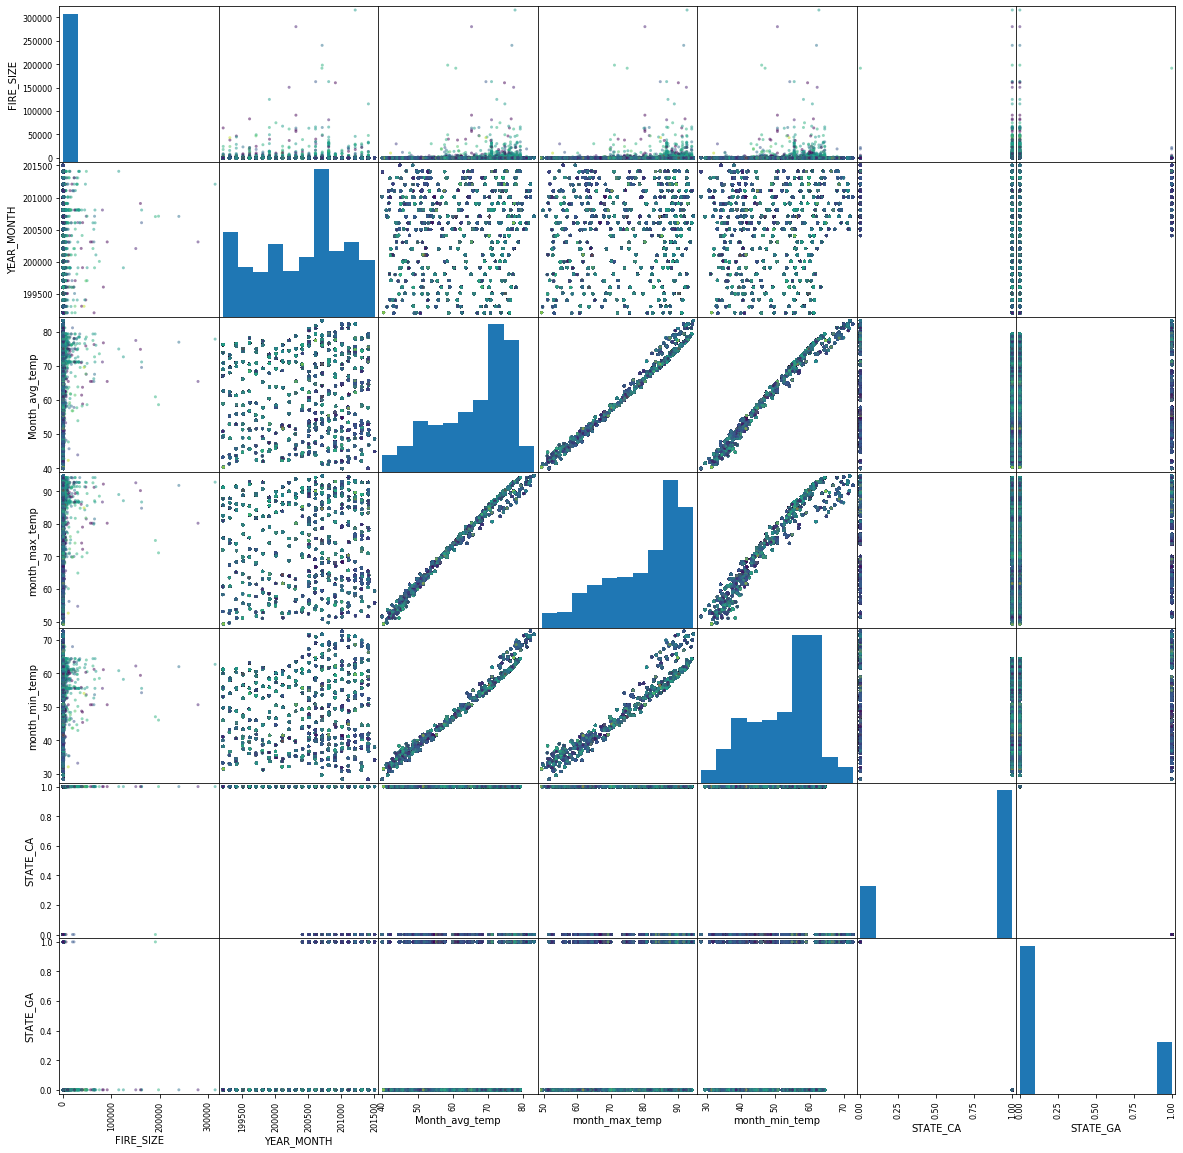

In [15]:
    
#iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
pd.plotting.scatter_matrix(X_train, c=encoded_y_train, figsize=(20, 20));

## Deep Learning for Predicting Fire Cause Category based on Fire size and weather averages

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

In [18]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               2100      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1212      
Total params: 3,472
Trainable params: 3,472
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 173612 samples
Epoch 1/60
173612/173612 - 8s - loss: 1.7495 - accuracy: 0.3525
Epoch 2/60
173612/173612 - 8s - loss: 1.7317 - accuracy: 0.3544
Epoch 3/60
173612/173612 - 9s - loss: 1.7268 - accuracy: 0.3554
Epoch 4/60
173612/173612 - 10s - loss: 1.7241 - accuracy: 0.3564
Epoch 5/60
173612/173612 - 9s - loss: 1.7219 - accuracy: 0.3578
Epoch 6/60
173612/173612 - 9s - loss: 1.7201 - accuracy: 0.3580
Epoch 7/60
173612/173612 - 10s - loss: 1.7185 - accuracy: 0.3582
Epoch 8/60
173612/173612 - 8s - loss: 1.7175 - accuracy: 0.3586
Epoch 9/60
173612/173612 - 9s - loss: 1.7164 - accuracy: 0.3586
Epoch 10/60
173612/173612 - 9s - loss: 1.7157 - accuracy: 0.3593
Epoch 11/60
173612/173612 - 10s - loss: 1.7149 - accuracy: 0.3592
Epoch 12/60
173612/173612 - 10s - loss: 1.7146 - accuracy: 0.3602
Epoch 13/60
173612/173612 - 9s - loss: 1.7136 - accuracy: 0.3609
Epoch 14/60
173612/173612 - 10s - loss: 1.7131 - accuracy: 0.3612
Epoch 15/60
173612/173612 - 8s - loss: 1.7127 - accuracy: 0.3612
Epoch

In [21]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

57871/1 - 2s - loss: 1.5836 - accuracy: 0.3694
Normal Neural Network - Loss: 1.7065809696829854, Accuracy: 0.3694078326225281


In [22]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [23]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['Miscellaneous' 'Debris Burning' 'Lightning' 'Powerline' 'Miscellaneous']
Actual Labels: ['Miscellaneous', 'Debris Burning', 'Equipment Use', 'Campfire', 'Equipment Use']


## Second Deep Learning Model to Predict Fire Category by Fire Cause and Weather Data Averages

In [24]:
# New Categorical assessment to try to find the Fire Size Category, from A to G:
# Class A - one-fourth acre or less;
# Class B - more than one-fourth acre, but less than 10 acres;
# Class C - 10 acres or more, but less than 100 acres;
# Class D - 100 acres or more, but less than 300 acres;
# Class E - 300 acres or more, but less than 1,000 acres;
# Class F - 1,000 acres or more, but less than 5,000 acres;
# Class G - 5,000 acres or more

# new X and y variables 
X = df_fire_class_size.drop("FIRE_SIZE_CLASS", axis=1)
y = df_fire_class_size["FIRE_SIZE_CLASS"]
X.head()


,STATE,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR
0,GA,201012,39.9,51.5,28.3,Arson
1,GA,201012,39.9,51.5,28.3,Debris Burning
2,GA,201012,39.9,51.5,28.3,Miscellaneous
3,GA,201012,39.9,51.5,28.3,Debris Burning
4,GA,201012,39.9,51.5,28.3,Children


In [25]:
X = pd.get_dummies(X, columns=["STATE"])

X.head()

,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR,STATE_CA,STATE_GA
0,201012,39.9,51.5,28.3,Arson,0,1
1,201012,39.9,51.5,28.3,Debris Burning,0,1
2,201012,39.9,51.5,28.3,Miscellaneous,0,1
3,201012,39.9,51.5,28.3,Debris Burning,0,1
4,201012,39.9,51.5,28.3,Children,0,1


In [26]:
 
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), ["STAT_CAUSE_DESCR"])], remainder='passthrough')
# X = np.array(columnTransformer.fit_transform(X), dtype = np.str)

#### Referenced https://blog.contactsunny.com/data-science/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning
#### Didn't work for what i needed, missing steps

In [27]:
labelencoder = LabelEncoder()
X["STAT_CAUSE_DESCR"] = labelencoder.fit_transform(X["STAT_CAUSE_DESCR"])
#X["STATE"] = labelencoder.fit_transform(X["STATE"])
X.head()

# from sklearn.preprocessing import OneHotEncoder
# onehotencoder = OneHotEncoder(categorical_features = [6])
# X = onehotencoder.fit_transform(X).toarray()

,YEAR_MONTH,Month_avg_temp,month_max_temp,month_min_temp,STAT_CAUSE_DESCR,STATE_CA,STATE_GA
0,201012,39.9,51.5,28.3,0,0,1
1,201012,39.9,51.5,28.3,3,0,1
2,201012,39.9,51.5,28.3,7,0,1
3,201012,39.9,51.5,28.3,3,0,1
4,201012,39.9,51.5,28.3,2,0,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [29]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [30]:
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [31]:
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

## Check Target (Fire Size Class) Proportions

In [32]:
print('Training:', np.bincount(encoded_y_train) / float(len(encoded_y_train)) * 100.0)
print('Test:', np.bincount(encoded_y_test) / float(len(encoded_y_test)) * 100.0)

Training: [45.62011842 46.3671866   6.11593669  0.9561551   0.4884455   0.29836647
  0.15379121]
Test: [45.62043165 46.36691953  6.11705345  0.95730158  0.4872907   0.29721277
  0.15379033]


## Deep Learning Model for Fire Size Class

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model and add layers
model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=7))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=7, activation='softmax'))

In [34]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               800       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 707       
Total params: 11,607
Trainable params: 11,607
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Train on 173612 samples
Epoch 1/100
173612/173612 - 7s - loss: 0.9620 - accuracy: 0.5378
Epoch 2/100
173612/173612 - 5s - loss: 0.9550 - accuracy: 0.5437
Epoch 3/100
173612/173612 - 5s - loss: 0.9508 - accuracy: 0.5519
Epoch 4/100
173612/173612 - 5s - loss: 0.9429 - accuracy: 0.5612
Epoch 5/100
173612/173612 - 5s - loss: 0.9391 - accuracy: 0.5640
Epoch 6/100
173612/173612 - 8s - loss: 0.9343 - accuracy: 0.5673
Epoch 7/100
173612/173612 - 11s - loss: 0.9322 - accuracy: 0.5698
Epoch 8/100
173612/173612 - 10s - loss: 0.9315 - accuracy: 0.5713
Epoch 9/100
173612/173612 - 9s - loss: 0.9307 - accuracy: 0.5711
Epoch 10/100
173612/173612 - 7s - loss: 0.9299 - accuracy: 0.5723
Epoch 11/100
173612/173612 - 8s - loss: 0.9294 - accuracy: 0.5718
Epoch 12/100
173612/173612 - 8s - loss: 0.9288 - accuracy: 0.5734
Epoch 13/100
173612/173612 - 9s - loss: 0.9284 - accuracy: 0.5732
Epoch 14/100
173612/173612 - 9s - loss: 0.9282 - accuracy: 0.5735
Epoch 15/100
173612/173612 - 6s - loss: 0.9278 - accuracy: 

In [37]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

57871/1 - 2s - loss: 0.8493 - accuracy: 0.5706
Normal Neural Network - Loss: 0.927713660238995, Accuracy: 0.570631206035614


In [38]:
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [39]:
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['B' 'A' 'B' 'B' 'A']
Actual Labels: ['A', 'A', 'B', 'B', 'A']
